In [1]:
import pandas
import numpy as np

tqdm_flag = True
try:
    from tqdm import tqdm
except:
    tqdm_flag = False

KeyboardInterrupt: 

In [ ]:
# Load file
dir = "/n/holyscratch01/iaifi_lab/rikab/top"
table = pandas.read_hdf(dir + "/val.h5", "table", stop = 100000)

In [ ]:
X = np.zeros((table.shape[0], 200, 4) , dtype = np.float32)
Y = np.zeros((table.shape[0],), dtype = np.int32)


In [ ]:
Y = table["is_signal_new"]

P = np.zeros((table.shape[0], 4) , dtype = np.float32)

for i in tqdm(range(200)):


    ys = table["is_signal_new"]

    # pt
    X[:,i,0] = np.sqrt(np.square(table["PX_%d" % i]) + np.square(table["PY_%d" % i]))
    mask = X[:,i,0] > 0
    temp = table[table["E_%d" % i]> 0]

    X[mask,i,1] = 0.5 * np.log(  np.divide( np.add(temp["E_%d" % i] , temp["PZ_%d" % i]) , np.subtract(temp["E_%d" % i] , temp["PZ_%d" % i])  ) )
    X[mask,i,2] = np.arctan2(temp["PY_%d" % i] ,temp["PX_%d" % i])

    P[:,0] = P[:,0] + table["E_%d" % i]
    P[:,1] = P[:,1] + table["PX_%d" % i]
    P[:,2] = P[:,2] + table["PY_%d" % i]
    P[:,3] = P[:,3] + table["PZ_%d" % i]

M = np.sqrt(P[:,0]**2 - P[:,1]**2 - P[:,2]**2 - P[:,3]**2)

for i,x in enumerate(tqdm(X)):
    mask=x[:,0]>0
    y_avg =np.average(x[mask,1:3],weights=x[mask,0],axis=0)
    x[mask,1:3]-=y_avg
    x[mask,1:3] = x[mask,1:3]

100%|██████████| 100000/100000 [00:06<00:00, 14595.11it/s]


(50190,)


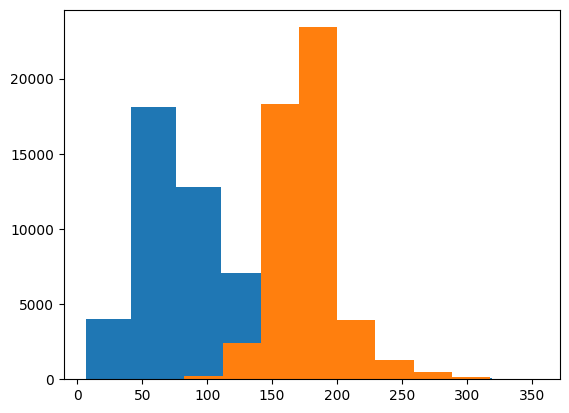

In [ ]:
import matplotlib.pyplot as plt

plt.hist(M[Y ==0])
plt.hist(M[Y ==1])
print(Y[Y == 1].shape)

In [ ]:
dataset = table["table"]
# [:5000]



def pT(p):
    return np.sqrt(p[:,1]**2 + p[:,2]**2)

def psuedorapidity(p):

    p3 = np.sqrt(p[:,1]**2 + p[:,2]**2 + p[:,3]**2)
    return np.nan_to_num(np.arctanh(p[:,3] / p3))

def phi(p):
    return np.nan_to_num(np.arctan(p[:,2] / p[:,1]))

def m(p):
    return np.sqrt(p[:,0]**2 - p[:,1]**2 - p[:,2]**2 - p[:,3]**2)

# print(dataset[5434][1].reshape((-1,4)))


X = np.zeros((dataset.shape[0], int(dataset[0][1].shape[0] / 4), 4))
Y = np.zeros((dataset.shape[0],), dtype=np.int32)


print(X.shape)
# if tqdm_flag:
#     dataset = tqdm(dataset)

for (i,event) in enumerate(dataset):

    p = event[1].reshape((-1,4))
    Y[i] = event[2][1]
    X[i,:,0] = pT(p)
    X[i,:,1] = psuedorapidity(p)
    X[i,:,2] = phi(p)
    X[i,:,3] = m(p)




(403000, 201, 4)


/tmp/ipykernel_2227948/4150765105.py:12: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num(np.arctanh(p[:,3] / p3))
/tmp/ipykernel_2227948/4150765105.py:15: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num(np.arctan(p[:,2] / p[:,1]))
/tmp/ipykernel_2227948/4150765105.py:18: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(p[:,0]**2 - p[:,1]**2 - p[:,2]**2 - p[:,3]**2)


KeyboardInterrupt: 

In [ ]:
# validate
ms = np.zeros_like(Y[:5000], dtype = np.float32)
for (i,event) in enumerate(dataset[:5000]):

    p = event[1].reshape((-1,4))
    ms[i] = m(np.sum(p, axis = 0)[np.newaxis, :])

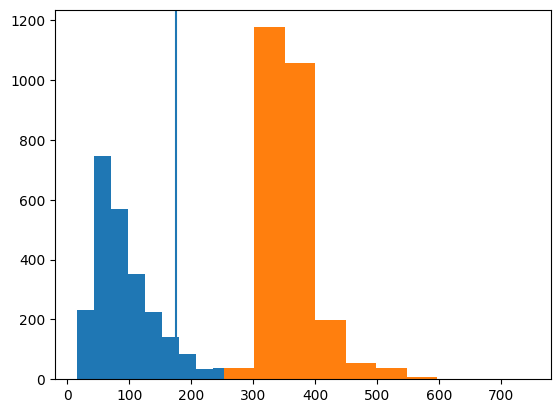

In [ ]:
import matplotlib.pyplot as plt

plt.hist(ms[Y[:5000] ==0])
plt.hist(ms[Y[:5000] ==1])
plt.axvline(175)

# print(X[:,:,3].flatten())

# plt.hist(X[:,:,3].flatten(), range=(0,1))
# plt.yscale("log")

In [ ]:
np.savez(dir + "/val.npz", X[:1000],Y[:1000])

In [ ]:
X_test, Y_test = np.load(dir + "/val.npz", allow_pickle=True)

In [ ]:
plt.hist(X_test[Y_test == 1,3])

TypeError: string indices must be integers

: 